In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
results = pd.read_csv("20210218_robust_study.csv")
results_fab = pd.read_csv("20210218_robust_study_fab.csv")
results_flow = pd.read_csv("20210218_robust_study_flow.csv")

In [9]:
results

,Unnamed: 0,Chip #,orifice_size,aspect_ratio,expansion_ratio,normalized_water_inlet,normalized_oil_inlet,normalized_orifice_length,score,size_scores,rate_scores
0,0,1,75,1.0,2,2.0,2.0,1.0,0.996833,1.241725,0.751942
1,1,2,75,1.5,3,2.5,2.5,1.5,0.855910,1.102337,0.609483
2,2,3,75,2.0,4,3.0,3.0,2.0,0.867210,1.061636,0.672784
3,3,4,75,2.5,5,3.5,3.5,2.5,0.784744,1.070998,0.498491
4,4,5,75,3.0,6,4.0,4.0,3.0,0.815585,1.075437,0.555733
5,5,6,100,1.0,3,3.5,4.0,2.0,0.836253,1.019122,0.653385
6,6,7,100,1.5,4,4.0,2.0,2.5,0.834640,1.116685,0.552595
7,7,8,100,2.0,5,2.0,2.5,3.0,0.782694,0.943715,0.621673
8,8,9,100,2.5,6,2.5,3.0,1.0,0.828330,1.169815,0.486844
9,9,10,100,3.0,2,3.0,3.5,1.5,0.895435,1.089000,0.701870


Text(0, 0.5, 'Range (max - min)')

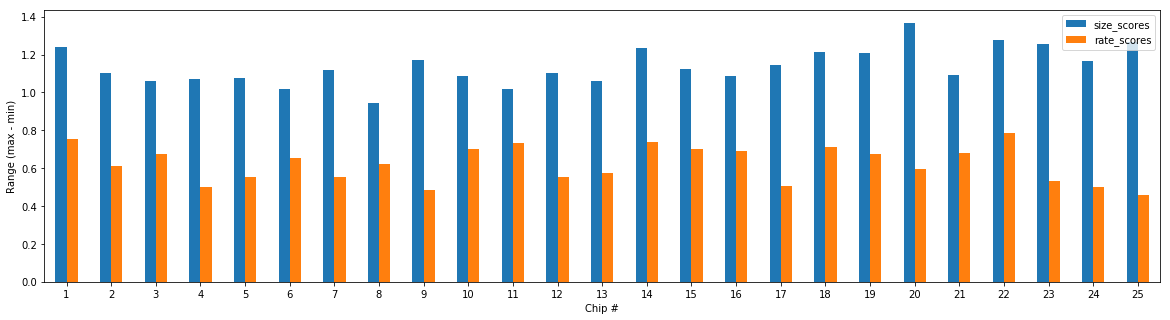

In [10]:
ax = results.plot.bar(x="Chip #", y=["size_scores","rate_scores"], rot=0, figsize=[20,5])
ax.set_ylabel("Range (max - min)")

(0.6, 1.0)

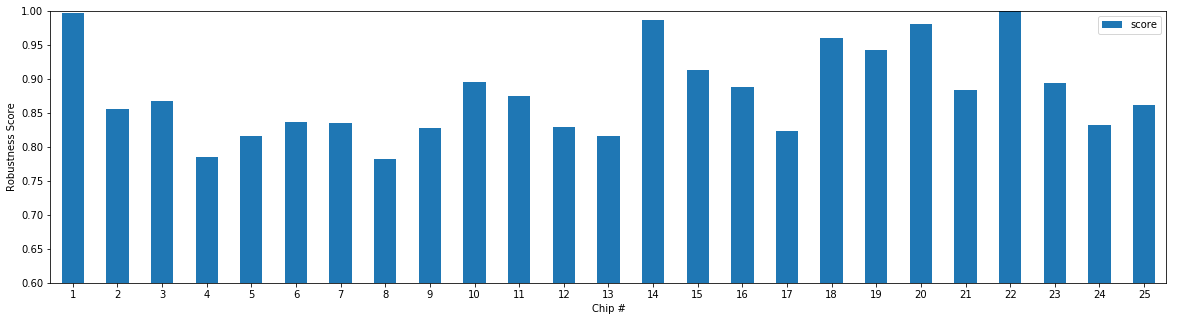

In [11]:
ax = results.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
ax.set_ylabel("Robustness Score")
ax.set_ylim([.6, 1.0])

In [12]:
versatility_results = pd.read_csv("20210207_versatility_scores.csv")

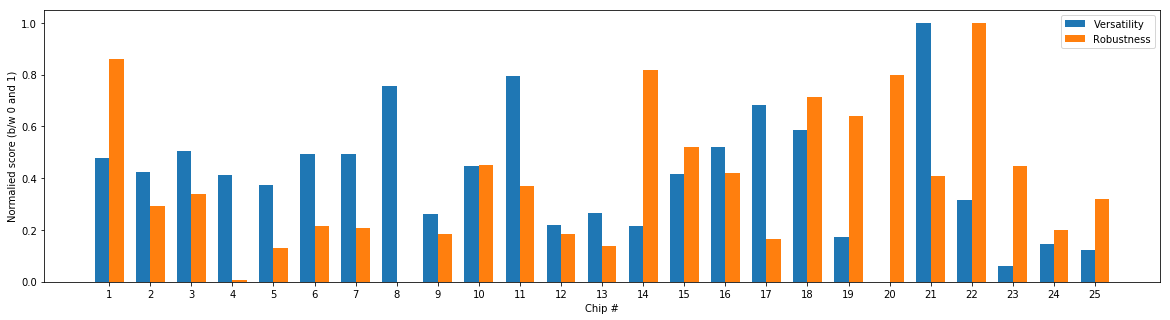

In [13]:
import numpy as np
v_scores = versatility_results.loc[:,"score"]
r_scores = results.loc[:,"score"]
normed_vers = (v_scores - v_scores.min())/(v_scores.max() - v_scores.min())
normed_rob = (r_scores - r_scores.min())/(r_scores.max() - r_scores.min())

x = np.arange(25) + 1
width = 0.35
fig, ax = plt.subplots(figsize=[20,5])
rects1 = ax.bar(x - width/2, normed_vers, width, label="Versatility")
rects2 = ax.bar(x + width/2, normed_rob, width, label='Robustness')
ax.legend(["Versatility", "Robustness"])
ax.set_xticks(x)
ax.set_xlabel("Chip #")
ax.set_ylabel("Normalied score (b/w 0 and 1)")
plt.show()


# versatility_results.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
# ax = results.plot.bar(x="Chip #", y=["score"], rot=0, figsize=[20,5])
# ax.set_ylabel("Robustness Score")
# ax.set_ylim([.6, 1.0])

Text(0, 0.5, 'Score')

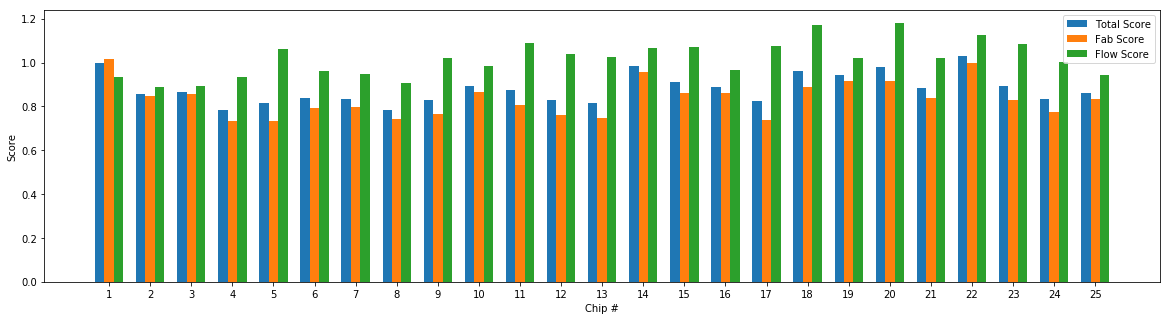

In [25]:
robustness_total = results.loc[:,"score"]
robustness_fab = results_fab.loc[:,"score"]
robustness_flow = results_flow.loc[:,"score"]

x = np.arange(25) + 1
width = 0.23
fig, ax = plt.subplots(figsize=[20,5])
rects1 = ax.bar(x - width, robustness_total, width, label="Total Score")
rects2 = ax.bar(x, robustness_fab, width, label='Fab Score')
rects3 = ax.bar(x + width, robustness_flow, width, label='Flow Score')
ax.legend(["Total Score", "Fab Score", "Flow Score"])

ax.set_xticks(x)
ax.set_xlabel("Chip #")
ax.set_ylabel("Score")
